In [8]:
from geotiff import *
import datetime
import os
from dateutil.relativedelta import *
import matplotlib.pylab as plt
import matplotlib as mpl

In [9]:
def simple_plot_index(a,title=""):
    fig, ax = plt.subplots()

    #cmap='RdBu'
    cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["red","orange","yellow","white","pink","violet", "#0f0f0f"])
    plt.title(title)
    im = plt.imshow(a, interpolation='none',cmap=cmap)
    plt.colormaps()
    # cbar = fig.colorbar(cax,ticks=[-1, 0, 1, 2, 10],orientation='vertical')
    cbar = fig.colorbar(im, orientation='vertical')
    plt.clim(-3,3)
    # cbar.ax.set_yticklabels(['< -1', '0', 1, 2,'> 10'])# vertically oriented
    # colorbar
    #ax.format_coord = Formatter(im)
    plt.show()

def main (oDateFrom,oDateTo):

    while (oDateFrom <= oDateTo):

        print (oDateFrom)

        ######## METEO

        if INDEX_METEO=="SPI":
            prefix= INDEX_METEO + accumulation_METEO + "-PERSIANN_"
        elif INDEX_METEO=="SPEI":
            prefix= INDEX_METEO + accumulation_METEO + "-PERSIANN-MODIS_"

        METEO_file= os.path.join(products_dir,INDEX_METEO,oDateFrom.strftime("%Y"),oDateFrom.strftime("%m"),prefix+oDateFrom.strftime("%Y%m")+".tif")

        METEO, xsize, ysize, geotransform, geoproj = readGeotiff(METEO_file)

        #simple_plot_index (METEO,prefix+oDateFrom.strftime("%Y%m"))

        combined = METEO * 0

        combined = combined + (METEO<METEO_threshold)

        ######## SOIL MOISTURE

        prefix= INDEX_HUM + accumulation_HUM + "-SMAP_"

        SMI_file= os.path.join(products_dir,INDEX_HUM,oDateFrom.strftime("%Y"),oDateFrom.strftime("%m"),prefix+oDateFrom.strftime("%Y%m")+".tif")

        SMI, xsize, ysize, geotransform, geoproj = readGeotiff(SMI_file)

        #simple_plot_index (SMI, prefix+oDateFrom.strftime("%Y%m"))

        combined=combined*(SMI<HUM_threshold)

        combined = combined + (SMI<HUM_threshold)

        ######## VEGETATION

        prefix= INDEX_VEG + accumulation_VEG + "-MODIS_" #FAPAR e VHI have the same

        VEG_file= os.path.join(products_dir,INDEX_VEG,oDateFrom.strftime("%Y"),oDateFrom.strftime("%m"),prefix+oDateFrom.strftime("%Y%m")+".tif")

        VEG, xsize, ysize, geotransform, geoproj = readGeotiff(VEG_file)

        #simple_plot_index (VEG,prefix+oDateFrom.strftime("%Y%m"))

        combined=combined*(VEG<VEG_threshold)

        combined = combined + (VEG<VEG_threshold)

        # PLOT combined

        fig, ax = plt.subplots()
        cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["white","yellow","orange","red"])
        im = plt.imshow(combined, interpolation='none',cmap=cmap)
        plt.title("combined_"+oDateFrom.strftime("%Y%m"))
        plt.colormaps()
        # cbar = fig.colorbar(cax,ticks=[-1, 0, 1, 2, 10],orientation='vertical')
        cbar = fig.colorbar(im, orientation='vertical')
        plt.clim(0,3)
        # cbar.ax.set_yticklabels(['< -1', '0', 1, 2,'> 10'])# vertically oriented
        #ax.format_coord = Formatter(im)
        plt.show()

        # combined drought indicator

        oDateFrom = oDateFrom +relativedelta(months=+1)
    print('Process ended with success')




2016-01-01 00:00:00


/Users/al/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less
/Users/al/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in less
/Users/al/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in less
/Users/al/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in less
/Users/al/opt/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in less


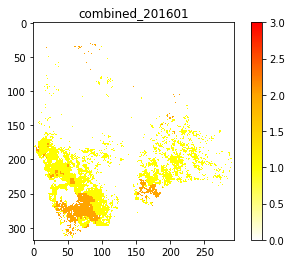

Process ended with success

2020-04-24 12:10:02.687702 - Process ended.



In [10]:
if __name__ == "__main__":

    #################################################################

    tmp_dir = "/Users/al/Documents/CIMA/Bolivia_sequias/Taller/Taller2/Esercizi/Binder/tmp"
    products_dir = "/Users/al/Documents/CIMA/Bolivia_sequias/Taller/Taller2/Esercizi/Binder/products"

    #################################################################

    sDateFrom = '201601'
    oDateFrom = datetime.datetime.strptime(sDateFrom,"%Y%m")

    sDateTo = '201601'
    oDateTo = datetime.datetime.strptime(sDateTo,"%Y%m")

    #################################################################

    INDEX_METEO="SPI"
    accumulation_METEO = "06"
    METEO_threshold = -1.3

    INDEX_HUM="SWDI"
    accumulation_HUM = "03"
    HUM_threshold=-1

    INDEX_VEG="VHI"
    accumulation_VEG = "02"
    VEG_threshold=0.2

    #################################################################

    main(oDateFrom,oDateTo)
    print('\n' + str(datetime.datetime.now()) + ' - Process ended.\n')